# EEP C118 Section 9A: Measurement Error

Suppose we want to know the relationship between hours slept and hours worked, but we have concerns about measurement error. We will use `sleep.dta` which contains the relevant data. Remember to read in `.dta` files, we need to use the `haven` package.

### 0. Data Prep

In [4]:
library(tidyverse)
library(haven)
sleepdata <- read_dta("sleep75.dta")

In [5]:
colnames(sleepdata)

[1] "age"      "black"    "case"     "clerical" "construc" "educ"    
 [7] "earns74"  "gdhlth"   "inlf"     "leis1"    "leis2"    "leis3"   
[13] "smsa"     "lhrwage"  "lothinc"  "male"     "marr"     "prot"    
[19] "rlxall"   "selfe"    "sleep"    "slpnaps"  "south"    "spsepay" 
[25] "spwrk75"  "totwrk"   "union"    "worknrm"  "workscnd" "exper"   
[31] "yngkid"   "yrsmarr"  "hrwage"   "agesq"

Let's make a new variable called _sleephrs_ that is hours slept per night.

In [6]:
sleepdata$sleephrs<-sleepdata$sleep/(7*60)
summary(sleepdata$sleephrs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.798   7.179   7.787   7.777   8.410  11.179 

Let's do the same thing for _totwrk_, making a variable called _wrkhrs_.

In [7]:
sleepdata$wrkhrs<-sleepdata$totwrk/(7*60)
summary(sleepdata$wrkhrs)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.699   5.448   5.055   6.409  15.274 

Great! Now let's run a regression and look at the results.

In [8]:
slr<-lm(sleephrs~wrkhrs, data=sleepdata)
summary(slr)


Call:
lm(formula = sleephrs ~ wrkhrs, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7856 -0.5720  0.0117  0.5965  3.1898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.53899    0.09265  92.165   <2e-16 ***
wrkhrs      -0.15075    0.01674  -9.005   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 704 degrees of freedom
Multiple R-squared:  0.1033,	Adjusted R-squared:  0.102 
F-statistic: 81.09 on 1 and 704 DF,  p-value: < 2.2e-16


### 1. Classical measurement error in an independent variable

In [10]:
# create error variable: random number between 0 and 4
sleepdata$error=runif(nrow(sleepdata), 0,4)
summary(sleepdata$error)
# Add random noise to work hours
sleepdata$wrkhrse=sleepdata$wrkhrs+sleepdata$error
summary(sleepdata$wrkhrse)
summary(sleepdata$wrkhrs)
slr_cme<-lm(sleephrs~wrkhrse, data=sleepdata)
summary(slr_cme)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005399 0.968199 1.984864 1.982547 3.017711 3.996401 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2061  5.5205  7.1721  7.0371  8.8014 18.0349 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.699   5.448   5.055   6.409  15.274 


Call:
lm(formula = sleephrs ~ wrkhrse, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7925 -0.5726  0.0055  0.6275  3.1953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.64156    0.11110  77.785  < 2e-16 ***
wrkhrse     -0.12285    0.01483  -8.282 6.07e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.011 on 704 degrees of freedom
Multiple R-squared:  0.08879,	Adjusted R-squared:  0.0875 
F-statistic:  68.6 on 1 and 704 DF,  p-value: 6.074e-16


**What happened to our estimated relationship between work hours and sleep hours?**

**What would happen if the random error in the measurement of work hours was larger?**

In [11]:
# create error variable: random number between 0 and 8
sleepdata$error=runif(nrow(sleepdata), 0,8)
summary(sleepdata$error)
# Add random noise to work hours
sleepdata$wrkhrse=sleepdata$wrkhrs+sleepdata$error
summary(sleepdata$wrkhrse)
summary(sleepdata$wrkhrs)
slr_cme2<-lm(sleephrs~wrkhrse, data=sleepdata)
summary(slr_cme2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02018 1.81735 3.89180 3.92152 6.03313 7.98151 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.579   6.599   9.035   8.976  11.444  18.098 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.699   5.448   5.055   6.409  15.274 


Call:
lm(formula = sleephrs ~ wrkhrse, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9401 -0.5899  0.0386  0.6116  3.4902 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.39040    0.11684  71.814  < 2e-16 ***
wrkhrse     -0.06833    0.01227  -5.569 3.64e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.036 on 704 degrees of freedom
Multiple R-squared:  0.0422,	Adjusted R-squared:  0.04084 
F-statistic: 31.02 on 1 and 704 DF,  p-value: 3.642e-08


**What about coefficient estimates for covariates? Are they affected by classical measurement error?**

In [12]:
mlr<-lm(sleephrs~wrkhrs+male+age, data=sleepdata)
summary(mlr)
mlr_cme<-lm(sleephrs~wrkhrse+male+age, data=sleepdata)
summary(mlr_cme)


Call:
lm(formula = sleephrs ~ wrkhrs + male + age, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5482 -0.5740 -0.0034  0.6284  3.1975 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.247958   0.161669  51.018   <2e-16 ***
wrkhrs      -0.165900   0.018001  -9.216   <2e-16 ***
male         0.202731   0.081827   2.478   0.0135 *  
age          0.006512   0.003318   1.962   0.0501 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9967 on 702 degrees of freedom
Multiple R-squared:  0.1166,	Adjusted R-squared:  0.1128 
F-statistic: 30.88 on 3 and 702 DF,  p-value: < 2.2e-16



Call:
lm(formula = sleephrs ~ wrkhrse + male + age, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7929 -0.5819  0.0213  0.6250  3.4025 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.064991   0.178491  45.184  < 2e-16 ***
wrkhrse     -0.069234   0.012669  -5.465 6.45e-08 ***
male         0.032128   0.081301   0.395   0.6928    
age          0.008123   0.003434   2.365   0.0183 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.033 on 702 degrees of freedom
Multiple R-squared:  0.05008,	Adjusted R-squared:  0.04602 
F-statistic: 12.34 on 3 and 702 DF,  p-value: 7.15e-08


**Why do the coefficient estimates change? Because the coefficient on work hours is biased, and `male` and `age` are not independent of work hours. Notice that while the coefficient on wkrhrs is attenuated, the coefficients on the other coviarates can change in a variety of ways -- it depends on their correlation with work hours.**

### 2. Non-classical measurement error in independent variable

Suppose $wrkhrs\_reported1=\sqrt{wrkhrs}+5$: people with low true work hours overreport their hours, and people with high true work hours underreport. The estimated coefficient on work hours becomes much larger! So we do not have attenuation here.

Then consider other possible error values that are correlated with true work hours. These could also be correlated with reported work hours, and all bets are off in these cases. In one example, the estimated coefficient is slightly smaller, and in the other it is slightly larger.

Note that it is easy to create a scenario where $cov(x^*,e)=0$ but somewhat difficult to create a scenario where $cov(x,e)=0$.

In [23]:
# create error variable: random number between 0 and 4
sleepdata$wrkhrs_rp1=sqrt(sleepdata$wrkhrs)+5
sleepdata$wrkhrs_rp2=sleepdata$wrkhrs-sqrt(sleepdata$wrkhrs+4)/2
sleepdata$wrkhrs_rp3=sleepdata$wrkhrs+log(sleepdata$wrkhrs+1)
summary(sleepdata$wrkhrs)
summary(sleepdata$wrkhrs_rp1)
summary(sleepdata$wrkhrs_rp2)
summary(sleepdata$wrkhrs_rp3)
print("No measurement error")
slr<-lm(sleephrs~wrkhrs, data=sleepdata)
summary(slr)
print("Measurement error function 1")
slr_ncme1<-lm(sleephrs~wrkhrs_rp1, data=sleepdata)
summary(slr_ncme1)
print("Measurement error function 2")
slr_ncme2<-lm(sleephrs~wrkhrs_rp2, data=sleepdata)
summary(slr_ncme2)
print("Measurement error function 3")
slr_ncme3<-lm(sleephrs~wrkhrs_rp3, data=sleepdata)
summary(slr_ncme3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.699   5.448   5.055   6.409  15.274 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.000   6.923   7.334   7.149   7.532   8.908 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   2.311   3.911   3.563   4.796  13.079 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.246   7.311   6.751   8.412  18.063 

[1] "No measurement error"



Call:
lm(formula = sleephrs ~ wrkhrs, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7856 -0.5720  0.0117  0.5965  3.1898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.53899    0.09265  92.165   <2e-16 ***
wrkhrs      -0.15075    0.01674  -9.005   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 704 degrees of freedom
Multiple R-squared:  0.1033,	Adjusted R-squared:  0.102 
F-statistic: 81.09 on 1 and 704 DF,  p-value: < 2.2e-16


[1] "Measurement error function 1"



Call:
lm(formula = sleephrs ~ wrkhrs_rp1, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8076 -0.5961  0.0176  0.6223  3.2907 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.10368    0.41387  26.829  < 2e-16 ***
wrkhrs_rp1  -0.46535    0.05765  -8.072 2.99e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.013 on 704 degrees of freedom
Multiple R-squared:  0.08472,	Adjusted R-squared:  0.08342 
F-statistic: 65.16 on 1 and 704 DF,  p-value: 2.986e-15


[1] "Measurement error function 2"



Call:
lm(formula = sleephrs ~ wrkhrs_rp2, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7860 -0.5733  0.0102  0.6005  3.1872 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.36621    0.07543 110.917   <2e-16 ***
wrkhrs_rp2  -0.16536    0.01833  -9.021   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 704 degrees of freedom
Multiple R-squared:  0.1036,	Adjusted R-squared:  0.1023 
F-statistic: 81.37 on 1 and 704 DF,  p-value: < 2.2e-16


[1] "Measurement error function 3"



Call:
lm(formula = sleephrs ~ wrkhrs_rp3, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7864 -0.5843  0.0183  0.5980  3.2109 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.60003    0.10003  85.974   <2e-16 ***
wrkhrs_rp3  -0.12191    0.01372  -8.886   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.004 on 704 degrees of freedom
Multiple R-squared:  0.1008,	Adjusted R-squared:  0.09957 
F-statistic: 78.96 on 1 and 704 DF,  p-value: < 2.2e-16


### 3. Classical measurement error in the outcome variable

Suppose sleep is measured with classical random error of between 0-4 hours. What happens to our estimated coefficients?

In [24]:
sleepdata$error=runif(nrow(sleepdata), 0,4)
sleepdata$sleephrse=sleepdata$sleephrs+sleepdata$error
summary(sleepdata$sleephrse)
summary(sleepdata$sleephrs)
mlr<-lm(sleephrs~wrkhrs+male, data=sleepdata)
summary(mlr)
mlr2<-lm(sleephrse~wrkhrs+male, data=sleepdata)
summary(mlr2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.433   8.741   9.895   9.844  11.016  14.817 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.798   7.179   7.787   7.777   8.410  11.179 


Call:
lm(formula = sleephrs ~ wrkhrs + male, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6432 -0.5801 -0.0053  0.6291  3.2851 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.50763    0.09307  91.409  < 2e-16 ***
wrkhrs      -0.16825    0.01800  -9.349  < 2e-16 ***
male         0.21151    0.08187   2.584  0.00998 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9987 on 703 degrees of freedom
Multiple R-squared:  0.1117,	Adjusted R-squared:  0.1092 
F-statistic: 44.21 on 2 and 703 DF,  p-value: < 2.2e-16



Call:
lm(formula = sleephrse ~ wrkhrs + male, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0438 -1.0885  0.0386  1.2204  4.3336 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.69783    0.14441  74.078  < 2e-16 ***
wrkhrs      -0.19257    0.02792  -6.896 1.19e-11 ***
male         0.21060    0.12703   1.658   0.0978 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.55 on 703 degrees of freedom
Multiple R-squared:  0.06464,	Adjusted R-squared:  0.06198 
F-statistic: 24.29 on 2 and 703 DF,  p-value: 6.294e-11


**The random error might be correlated with the X variables by random chance, leading to bias, but we note that the coefficients are pretty similar. In both cases, however, the standard errors have increased: our estimates are less precise!**

**Let's look at what happens if we repeat the process of generating random error multiple times. We'll do 1000 iterations of generating random error, regress sleep hours measured with error on work hours, store the estimated coefficients, then plot the distribution.**

In [26]:
library(ggplot2)

In [59]:
estimates <- data.frame(matrix(NA,    # Create empty data frame
                          nrow = 1000,
                          ncol = 1)) 
estimates$coef<-0
estimates$tstat<-0
for(i in 1:1000) {
    set.seed(i)
    sleepdata$error=runif(nrow(sleepdata), 0,4)
    sleepdata$sleephrse=sleepdata$sleephrs+sleepdata$error
    clm_y<-lm(sleephrse~wrkhrs, data=sleepdata)
    estimates[i,'coef']<-summary(clm_y)$coefficients[2,1] 
    estimates[i,'tstat']<-summary(clm_y)$coefficients[2,3] 
}

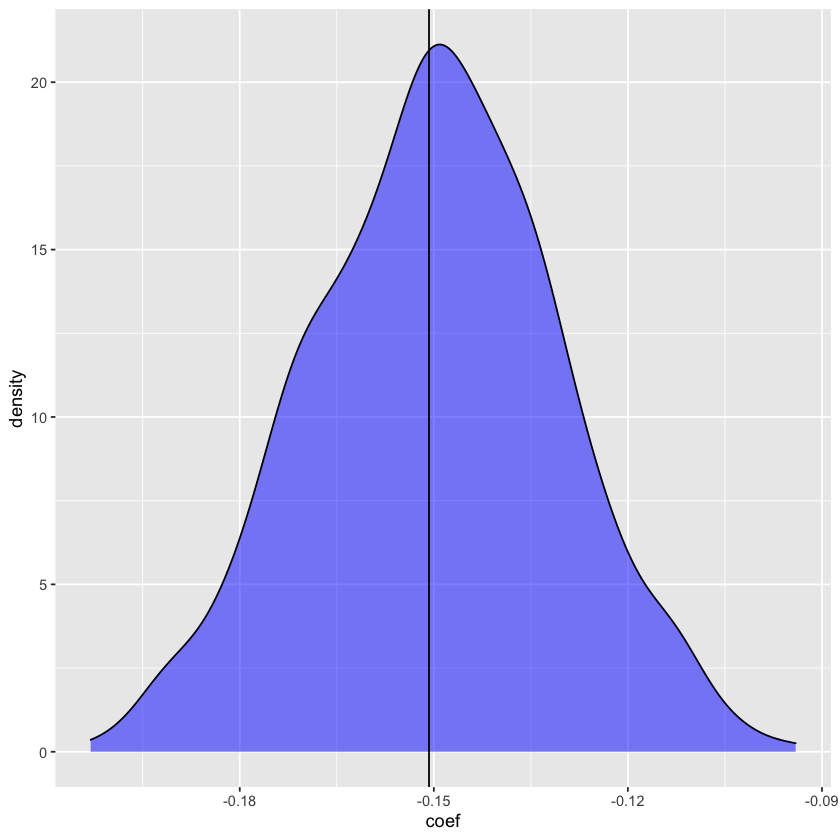

In [60]:
slr<-lm(sleephrs~wrkhrs, data=sleepdata)
truth<-summary(slr)$coefficients[2,1]
p <- ggplot(estimates, aes(x=coef)) + 
    geom_density(fill = "blue", alpha = .5) +
    geom_vline( xintercept = truth)
p

**The estimates are centered around the 'true' coefficient value! What about the t-stats?** 

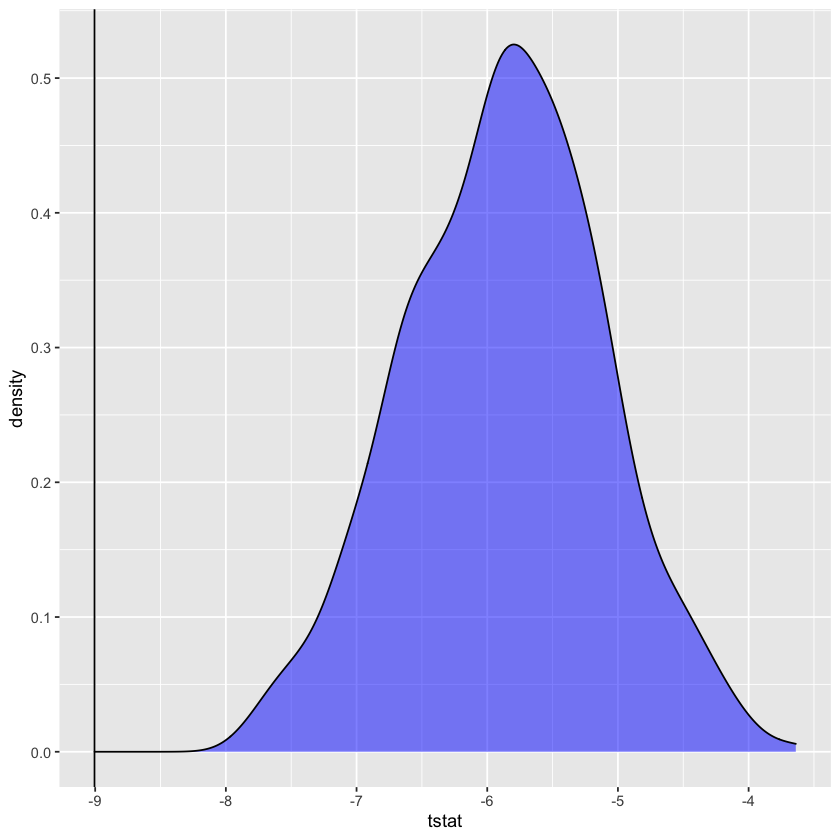

In [61]:
slr<-lm(sleephrs~wrkhrs, data=sleepdata)
truth<-summary(slr)$coefficients[2,3]
p <- ggplot(estimates, aes(x=tstat)) + 
    geom_density(fill = "blue", alpha = .5) +
    geom_vline( xintercept = truth)
p

**The 'true' t-stat is around -9, but the t-stats with classical error in the outcome variable are centered around -6, with almost none as large (in absolute value) as -9. This shows how the estimates become less precise.**

**What if y is measured with non-classical measurement error? Let's consider where the error varies first by sex and then by sleep hours.**

In [63]:
sleepdata$sleephrse1=sleepdata$sleephrs+sqrt(sleepdata$error+1)*sleepdata$male
sleepdata$sleephrse2=sleepdata$sleephrs+sqrt(sleepdata$sleephrs+1)*sleepdata$error
mlr<-lm(sleephrs~wrkhrs+male, data=sleepdata)
summary(mlr)
mlr1<-lm(sleephrse1~wrkhrs+male, data=sleepdata)
summary(mlr1)
mlr2<-lm(sleephrse2~wrkhrs+male, data=sleepdata)
summary(mlr2)


Call:
lm(formula = sleephrs ~ wrkhrs + male, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6432 -0.5801 -0.0053  0.6291  3.2851 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.50763    0.09307  91.409  < 2e-16 ***
wrkhrs      -0.16825    0.01800  -9.349  < 2e-16 ***
male         0.21151    0.08187   2.584  0.00998 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9987 on 703 degrees of freedom
Multiple R-squared:  0.1117,	Adjusted R-squared:  0.1092 
F-statistic: 44.21 on 2 and 703 DF,  p-value: < 2.2e-16



Call:
lm(formula = sleephrse1 ~ wrkhrs + male, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6469 -0.6115  0.0190  0.6271  3.2858 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.50099    0.09699  87.646   <2e-16 ***
wrkhrs      -0.16662    0.01876  -8.884   <2e-16 ***
male         1.90969    0.08532  22.383   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.041 on 703 degrees of freedom
Multiple R-squared:  0.4162,	Adjusted R-squared:  0.4146 
F-statistic: 250.6 on 2 and 703 DF,  p-value: < 2.2e-16



Call:
lm(formula = sleephrse2 ~ wrkhrs + male, data = sleepdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3809 -3.1322  0.1856  3.0473  9.0247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.80882    0.34888  42.447  < 2e-16 ***
wrkhrs      -0.24996    0.06746  -3.705 0.000228 ***
male         0.34178    0.30689   1.114 0.265781    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.744 on 703 degrees of freedom
Multiple R-squared:  0.01928,	Adjusted R-squared:  0.01649 
F-statistic: 6.911 on 2 and 703 DF,  p-value: 0.001066


**All bets are off!**